In [26]:
import pandas as pd
from collections import defaultdict
import numpy as np

import matplotlib.pyplot as plt


In [2]:
df_raw_interactions = pd.read_csv("datasets/RAW_interactions.csv")
df_raw_recipes = pd.read_csv("datasets/RAW_recipes.csv")
df_pp_users = pd.read_csv("datasets/PP_users.csv")
df_pp_recipes = pd.read_csv("datasets/PP_recipes.csv")
df_train = pd.read_csv("datasets/interactions_train.csv")
df_test = pd.read_csv("datasets/interactions_test.csv")
df_val = pd.read_csv("datasets/interactions_validation.csv")
df_ingr_map = pd.read_csv("datasets/ingr_map.csv")

In [3]:
def convToMap(data, value_cols):

    if isinstance(value_cols, str):
        value_cols = [value_cols]

    for col in ['id'] + value_cols:
        if col not in data.columns:
            raise ValueError(f"Column '{col}' not found in the DataFrame.")
    
    if(len(value_cols) == 1):
        value_map_1 = defaultdict(set)
        for _, row in data.iterrows():
            value_map_1[row['id']].add(row[value_cols[0]])
        return value_map_1
    else:
        value_map_mult = defaultdict(list)
        for _, row in data.iterrows():
            for col in value_cols:
                value_map_mult[row['id']].append(row[col])
        return value_map_mult

In [4]:
id_to_ingr = convToMap(df_ingr_map, "replaced")
id_to_recipe = convToMap(df_raw_recipes, ["name","minutes", "nutrition", "n_steps", "ingredients", "n_ingredients"])

In [5]:
df_train_clean = df_train.drop(["date", "u", "i"], axis=1)
df_test_clean = df_test.drop(["date", "u", "i"], axis=1)
df_val_clean = df_val.drop(["date", "u", "i"], axis=1)

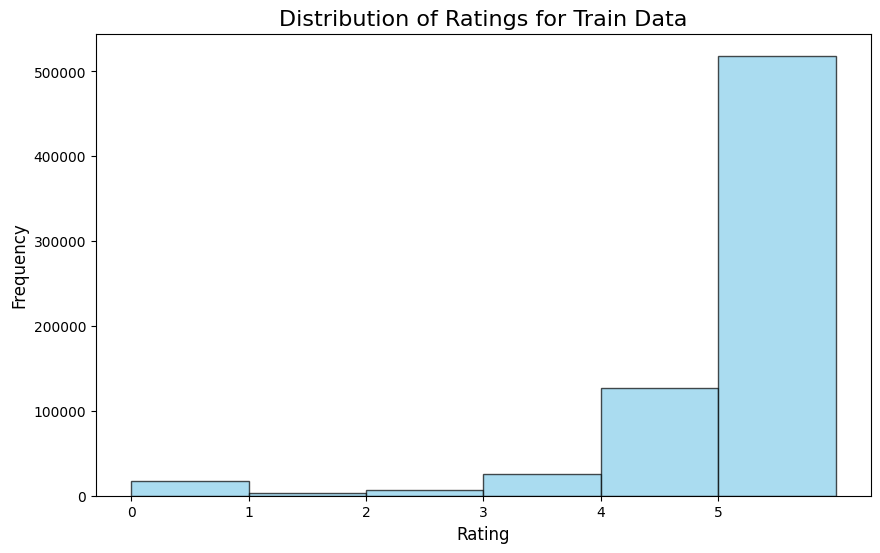

In [6]:
plt.figure(figsize=(10, 6))
bin_edges = range(0, 7)
plt.hist(df_train_clean['rating'], bins=bin_edges, edgecolor='black', color='skyblue', alpha=0.7)

# Adding titles and labels
plt.title('Distribution of Ratings for Train Data', fontsize=16)
plt.xticks(range(0, 6))
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Show the plot
plt.show()

In [7]:
df_train_clean.head()

,user_id,recipe_id,rating
0,2046,4684,5.0
1,2046,517,5.0
2,1773,7435,5.0
3,1773,278,4.0
4,2046,3431,5.0


In [8]:
df_train_clean['rating'].mean()

np.float64(4.574089892559891)

In [9]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
X_resampled, y_resampled = SMOTE().fit_resample(df_train_clean.iloc[:, :2], df_train_clean['rating'])

In [10]:
X_resampled

,user_id,recipe_id
0,2046,4684
1,2046,517
2,1773,7435
3,1773,278
4,2046,3431
...,...,...
3111403,4659,33859
3111404,499339,73708
3111405,571112,19342
3111406,14480,41835


In [11]:
y_resampled

0          5.0
1          5.0
2          5.0
3          4.0
4          5.0
          ... 
3111403    4.0
3111404    4.0
3111405    4.0
3111406    4.0
3111407    4.0
Name: rating, Length: 3111408, dtype: float64

In [12]:
df_comb = pd.concat([X_resampled, y_resampled], axis=1)

In [13]:
len(X_resampled)

3111408

In [14]:
df_comb.head()

,user_id,recipe_id,rating
0,2046,4684,5.0
1,2046,517,5.0
2,1773,7435,5.0
3,1773,278,4.0
4,2046,3431,5.0


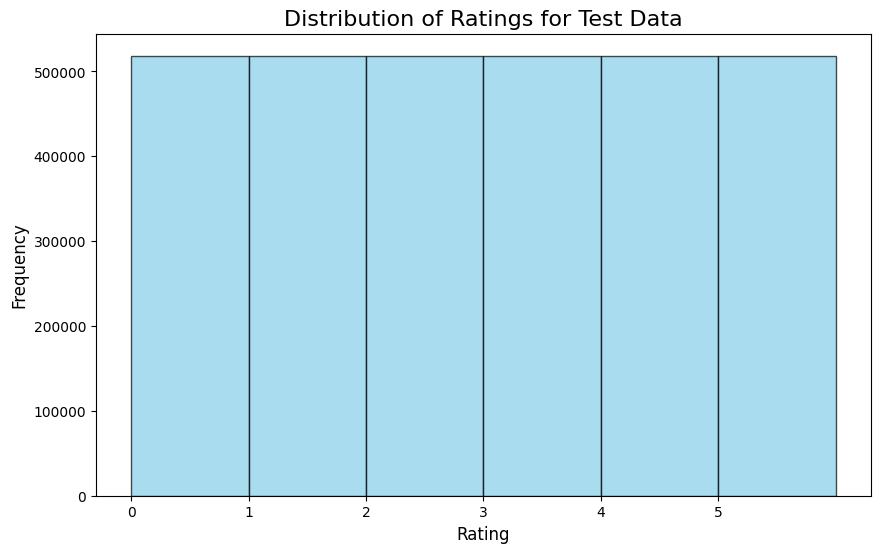

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(df_comb['rating'], bins=bin_edges, edgecolor='black', color='skyblue', alpha=0.7)

# Adding titles and labels
plt.title('Distribution of Ratings for Test Data', fontsize=16)
plt.xticks(range(0, 6))
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Show the plot
plt.show()

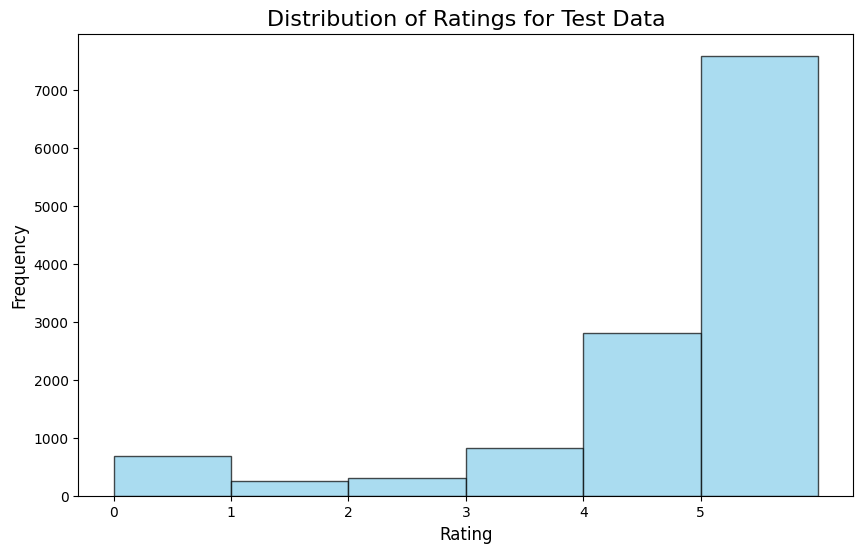

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df_test_clean['rating'], bins=bin_edges, edgecolor='black', color='skyblue', alpha=0.7)

# Adding titles and labels
plt.title('Distribution of Ratings for Test Data', fontsize=16)
plt.xticks(range(0, 6))
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Show the plot
plt.show()

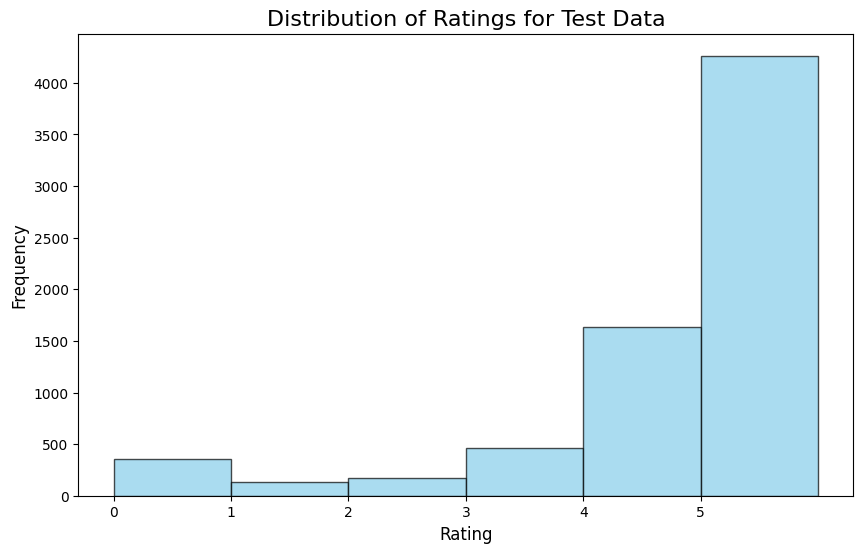

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(df_val_clean['rating'], bins=bin_edges, edgecolor='black', color='skyblue', alpha=0.7)

# Adding titles and labels
plt.title('Distribution of Ratings for Test Data', fontsize=16)
plt.xticks(range(0, 6))
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Show the plot
plt.show()

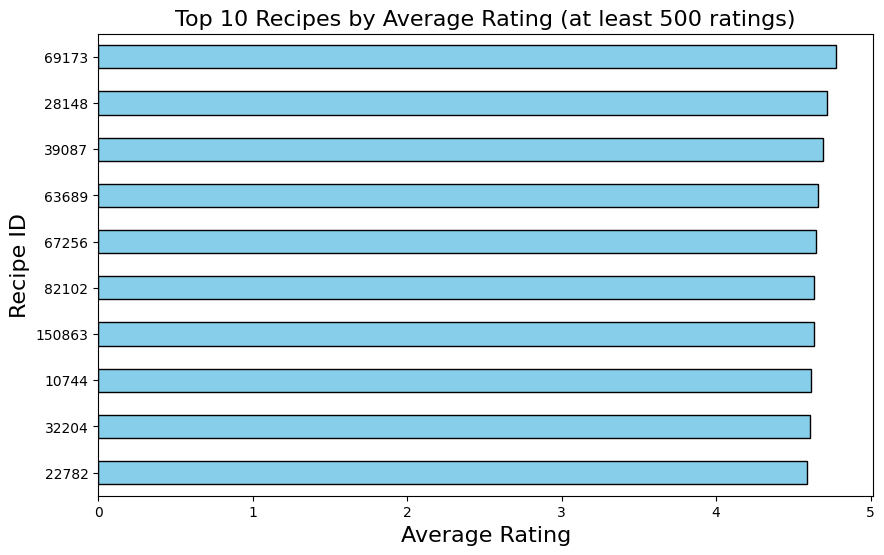

In [18]:
recipe_rating_counts = df_train_clean.groupby("recipe_id").size()

# Filter recipes that have at least `min_ratings` ratings
eligible_recipes = recipe_rating_counts[recipe_rating_counts >= 500].index

# Filter the data to include only eligible recipes
filtered_data = df_train_clean[df_train_clean["recipe_id"].isin(eligible_recipes)]

# Calculate the average rating for each recipe
recipe_avg_ratings = filtered_data.groupby("recipe_id")["rating"].mean()

# Sort the recipes by average rating in descending order and get the top 10
top_10_recipes = recipe_avg_ratings.sort_values(ascending=False).head(10)

# Plotting the top 10 recipes by rating
plt.figure(figsize=(10, 6))
top_10_recipes.plot(kind='barh', color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title(f'Top 10 Recipes by Average Rating (at least {500} ratings)', fontsize=16)
plt.xlabel('Average Rating', fontsize=16)
plt.ylabel('Recipe ID', fontsize=16)

# Show the plot
plt.gca().invert_yaxis() 
plt.show()

In [19]:
i = 1
for id in top_10_recipes.index:
    print("Rank " + str(i) + ": " + str(id_to_recipe[id][0]))
    i+=1

Rank 1: kittencal s italian melt in your mouth meatballs
Rank 2: oven fried chicken chimichangas
Rank 3: creamy cajun chicken pasta
Rank 4: my family s favorite sloppy joes  pizza joes
Rank 5: best ever banana cake with cream cheese frosting
Rank 6: kittencal s moist cheddar garlic oven fried chicken breast
Rank 7: panera s cream cheese potato soup
Rank 8: delicious chicken pot pie
Rank 9: whatever floats your boat  brownies
Rank 10: jo mama s world famous spaghetti


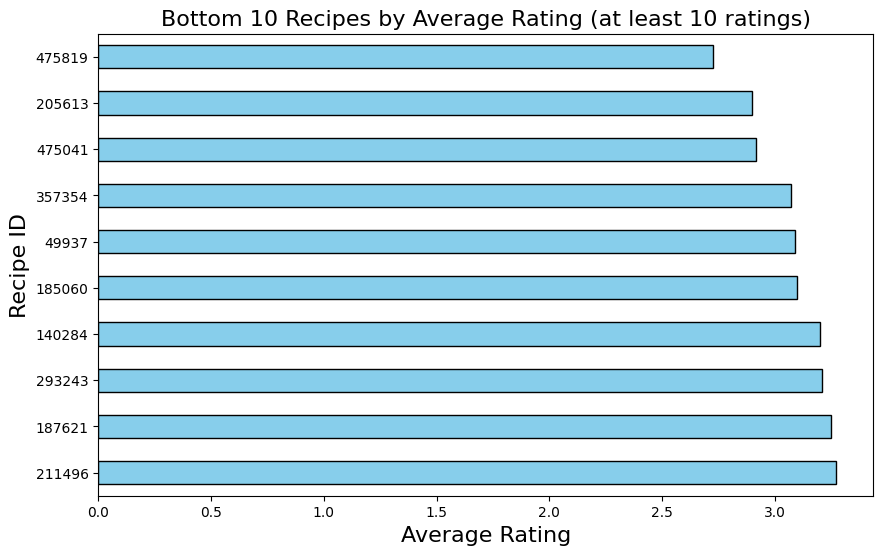

In [20]:
recipe_rating_counts = df_train_clean.groupby("recipe_id").size()

# Filter recipes that have at least `min_ratings` ratings
eligible_recipes = recipe_rating_counts[recipe_rating_counts >= 10].index

# Filter the data to include only eligible recipes
filtered_data = df_train_clean[df_train_clean["recipe_id"].isin(eligible_recipes)]

# Calculate the average rating for each recipe
recipe_avg_ratings = filtered_data.groupby("recipe_id")["rating"].mean()

# Sort the recipes by average rating in descending order and get the bottom 10
bot_10_recipes = recipe_avg_ratings.sort_values(ascending=True).head(10)

# Plotting the bottom 10 recipes by rating
plt.figure(figsize=(10, 6))
bot_10_recipes.plot(kind='barh', color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title(f'Bottom 10 Recipes by Average Rating (at least {10} ratings)', fontsize=16)
plt.xlabel('Average Rating', fontsize=16)
plt.ylabel('Recipe ID', fontsize=16)

# Show the plot
plt.gca().invert_yaxis() 
plt.show()

In [21]:
i = 1
for id in bot_10_recipes.index:
    print("Rank " + str(i) + ": " + str(id_to_recipe[id][0]))
    i+=1

Rank 1: breakfast tex mex haystacks
Rank 2: frozen banana popsicles
Rank 3: bacon   goat cheese potatoes with sundried tomato sour cream
Rank 4: chocolate  mug cake
Rank 5: banana oatmeal bars
Rank 6: spicy pork enchiladas with mole sauce
Rank 7: monster toes  for halloween
Rank 8: quick cinnamon rolls   no yeast
Rank 9: bruschetta chicken bake   weight watchers
Rank 10: special beef breakfast sausage


In [24]:
df_train_recc = df_train_clean.drop(["rating"], axis=1)
df_train_recc['used'] = True

In [25]:
df_train_recc.head()

,user_id,recipe_id,used
0,2046,4684,True
1,2046,517,True
2,1773,7435,True
3,1773,278,True
4,2046,3431,True


In [ ]:
all_users = df_train_recc['user_id'].unique()
all_recipes = range(100, 110)  # Assume recipe IDs are in this range for the example

# Create a set of existing user-recipe pairs
existing_pairs = set(zip(df_train_recc['user_id'], df_train_recc['recipe_id']))
num_negative_samples = len(df_train_recc) 

negative_samples = []
while len(negative_samples) < num_negative_samples:
    user = np.random.choice(all_users)
    recipe = np.random.choice(all_recipes)
    if (user, recipe) not in existing_pairs:  # Ensure the pair doesn't already exist
        negative_samples.append((user, recipe, False))

# Convert negative samples to a DataFrame
negative_data = pd.DataFrame(negative_samples, columns=['user_id', 'recipe_id', 'used'])

# Combine positive and negative data
balanced_data = pd.concat([df_train_recc, negative_data], ignore_index=True)

         user_id  recipe_id   used
0           2046       4684   True
1           2046        517   True
2           1773       7435   True
3           1773        278   True
4           2046       3431   True
...          ...        ...    ...
1397797   186159        105  False
1397798   124759        107  False
1397799   158328        106  False
1397800     9448        100  False
1397801   169735        103  False

[1397802 rows x 3 columns]


In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_val_clean['rating'], bins=bin_edges, edgecolor='black', color='skyblue', alpha=0.7)

# Adding titles and labels
plt.title('Distribution of Ratings for Test Data', fontsize=16)
plt.xticks(range(0, 6))
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Show the plot
plt.show()